In [107]:
import re  # for regular expressions
import nltk # for text manipulation
import string 
import warnings
import numpy as np  # library for mathematical functions
import pandas as pd  # for formatting data, creating data frames deals with data
import seaborn as sns #library for making statistical graphics
import matplotlib.pyplot as plt # for platting graph and visualizing dats


In [108]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [89]:
%matplotlib inline


In [90]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [91]:
# label ‘1’ denotes the tweet is racist/sexist 
# label ‘0’ denotes the tweet is not racist/sexist
# print(train.head(10))
# print((train['label']==1).head(10))
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [92]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [93]:
print('dimension of train dataset')
print(train.shape)
print('dimension of test dataset')
print(test.shape)

dimension of train dataset
(31962, 3)
dimension of test dataset
(17197, 2)


In [94]:
train['label'].value_counts()
# returns a series cotaining count of unique values
# The returning abject will be in decending order

# counts=train['label'].value_counts()
# print(type(counts))
# <class 'pandas.core.series.Series'>

0    29720
1     2242
Name: label, dtype: int64

> Inference from value count is that 7% approx tweets are racist/sexist 93% approx. tweets are non racist/sexist

> str.len() is used to determine length of each string in a Pandas series

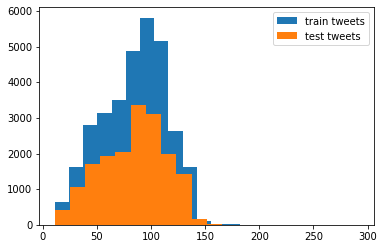

In [95]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train tweets') # bin srefer to the interval
plt.hist(length_test,bins=20,label='test tweets')
plt.legend()
plt.show()

> This histogram means plotting two histogram on top of one another range is chossen as 20 which means 
    0-20,20-40,40-60,..........  and frequency is Number of time a value appears in a the specific range
    like around range 80-100 frequency is 6000 which is possible as tweet count is 27000 approx.

> legend() function is used to put labels like 'train tweets','test tweets'  in the visual representation and 
postion in the graph like left top,left bottom etc

In [96]:
# data cleaning
combi = train.append(test,ignore_index=True) # here true means resulting indexing is labelled as 0,1,2,3,4...n-1

combi.shape
# print(combi.head(10))
# print(combi.tail(10))

(49159, 3)

In [97]:
# steps below will help in removing unwanted text pattersn from 
# the tweet

def remove_pattern(input_txt,pattern):
    """
    remove a pattern present in the string 
    using regular expression matching and substutution
    """
    r=re.findall(pattern,input_txt)  
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# re.findall(patter,string)
    # it finds or return the list of matching reglar expression
# re.sub(,replacement_string,string)

In [98]:
# this replaced @user in the tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()
# vectorize function create a loop over a function to the end.
# as remove_pattern is passed 

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


def myfunc(a, b):

    "Return a-b if a>b, otherwise return a+b"

    if a > b:

        return a - b

    else:

        return a + b
        

vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)
array([3, 4, 1, 2])

In [99]:
# remove punctuation and number and special ,characters
# replace everything except characters and hashtags with spaces
# using str.replace function of pandas 
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

C:\Users\RAJKAM~1\AppData\Local\Temp/ipykernel_6284/1274401551.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [100]:
# apply function in pandas help in apply a function over a column or whole data frame
# A lambda function is a small anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# x = lambda a : a + 10
combi['tidy_tweet'] = combi['tidy_tweet'].apply (lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


> TEXT NORMALIZATION
here nltks`s PorterStemmer() function to normalize the tweets but before this we have to tokenize the tweets.

* Token are individuals terms or words and tokenization is the process of splitting a string of text into tokens.

In [101]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [102]:
print(tokenized_tweet.head(10))

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

In [103]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])


In [104]:
tokenized_tweet.head(2)

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
Name: tidy_tweet, dtype: object

In [105]:
len(tokenized_tweet)

49159

In [106]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet
#tokenized_tweet.head(2)
#combi['tidy_tweet'].head(2)


In [109]:
combi['tidy_tweet'].head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
